## Online Simulation-Based Digital Twin: Nibelungenbrücke

This notebook introduces an online simulation-based digital twin developed for the Nibelungenbrücke bridge. The orchestration system is designed to interact dynamically with the user by gathering key inputs; such as time, physical parameters, and spatial positions to perform real-time simulations of the bridge structure.

The simulations are powered by the FenicSXConcrete package and support both thermomechanical and structural deflection analyses. This framework enables physics-based modeling and continuous digital monitoring of the bridge's behavior.

Please run the code below once to install the packages!

In [7]:
#import sys
#!{sys.executable} -m pip install git+https://github.com/BAMresearch/FenicsXConcrete pint gmsh pytest jsonschema pandas pyproj tqdm pvlib

In [ ]:
#import sys
#!{sys.executable} -m pip install git+https://github.com/BAMresearch/FenicsXConcrete

In [8]:
import os
import sys

root_dir = os.getcwd()

orchestrator_dir = os.path.join(root_dir, 'nibelungenbruecke', 'scripts', 'digital_twin_orchestrator')

os.chdir(orchestrator_dir)

sys.path.insert(0, root_dir)


from nibelungenbruecke.scripts.digital_twin_orchestrator.orchestrator import Orchestrator

In [9]:
simulation_parameters = {
    'simulation_name': 'TestSimulation',
    'model': 'TransientThermal_1',
    'start_time': '2023-08-11T08:00:00Z',
    'end_time': '2023-09-11T08:01:00Z',
    'time_step': '10min',
    'model_parameter_path': '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/settings/digital_twin_default_parameters.json',
    'virtual_sensor_positions': [
        {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
        {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'}
        # Note: the real sensor positions are added automatically by the interface, so you don't need to specify them here.
    ],
    'parameter_update': {'rho': 2740, 'E': 310000000000},
    'full_field_results': False, # Set to True if you want full field results, the simulation will take longer and the results will be larger.
    'uncertainty_quantification': False, # Set to True if you want uncertainty quantification, the simulation will take longer and the results will be larger.
}

In [10]:
orchestrator = Orchestrator(simulation_parameters)

In [11]:
key=input("\nEnter the code to connect API: ").strip()
orchestrator.set_api_key(key)

In [12]:
simulation_parameters = {
    'simulation_name': 'TestSimulation',
    'model': 'TransientThermal_1',
    'start_time': '2023-01-01T00:00:00',
    'end_time': '2023-01-02T00:00:00',
    'time_step': '10min',
    'virtual_sensor_positions': [
        {'x': 0.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor1'},
        {'x': 1.0, 'y': 0.0, 'z': 0.0, 'name': 'Sensor2'}
        # Note: the real sensor positions are added automatically by the interface, so you don't need to specify them here.
    ],
    'full_field_results': False, # Set to True if you want full field results, the simulation will take longer and the results will be larger.
    'uncertainty_quantification': False, # Set to True if you want uncertainty quantification, the simulation will take longer and the results will be larger.
}

Now we run the simulation:

Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'
New model 'thermal_model' saved successfully.
Info    : Reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'...
Info    : 2443 entities
Info    : 2197 nodes
Info    : 12920 elements
Info    : Done reading '../../../use_cases/nibelungenbruecke_demonstrator_self_weight_fenicsxconcrete/input/models/mesh_3d 1.msh'


  0%|          | 9/4281 [00:06<54:23,  1.31it/s]


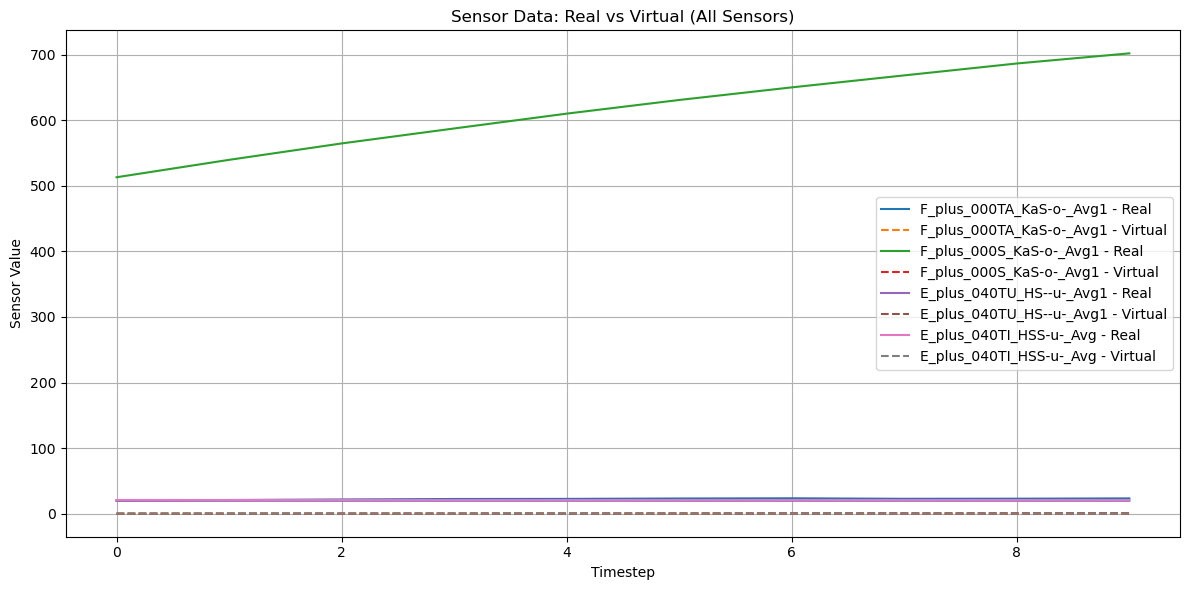

In [13]:
#dt.load(simulation_parameters) # Here we first load and then run, so that we can check the inputs before running the simulation and throw an error if something is wrong.
results = orchestrator.run() # The plotting should be separated from the run, so that we can run the simulation without plotting if we want to.

### Results

The result at the chosen sensors are plotted below. The results can be downloaded from the path written below.

In [14]:
# Results is probably just a dictionary of values with the sensor names as keys and the values as lists of results at each time step.
# The method should just be going over the keys defined as virtual sensors and plotting the results at those positions
# Passing the parameters as a dictionary to the method is also acceptable if needed.
# The option "uncertainty_quantification" is used to determine if the results should be plotted with uncertainty quantification or not.

#dt.plot_results_at_virtual_sensors(results, uncertainty_quantification=simulation_parameters['uncertainty_quantification'])
# The results file should be saved in an accessible path at the root, with metadata about the simulation and the results.
#print("PATH TO RESULTS:", dt.get_results_path())

We can plot aswell a comparison between model response and real sensors when available:

In [15]:
# orchestrator.plot_results_at_real_sensors(results, uncertainty_quantification=simulation_parameters['uncertainty_quantification'])  # Plot the results, this can be done after the run or separately if needed.

Execute the digital twin simulation using the loaded model and parameters. This will simulate the bridge behavior based on the selected physics model (e.g., thermal or displacement) and input configuration.

## Additional results (only if run)

### Full-field response

Here it is the 3D model full field response. The corresponding files can be downloaded from the given path

In [16]:
# The 3D model results are generated by activating the "paraview" parameter in the simulation parameters, which will save the results as xdmf and h5 files.
# The visualization can be done using pyvista, which is a wrapper around VTK that allows for easy 3D visualization in Python.
# The results can be visualized using the plot_full_field_response method, which will load the results file and plot the full field response.
# If implementing this as a method does not work, we can just use the pyvista library directly to load the results file and plot the full field response.
# if simulation_parameters['full_field_results']:
#    print("Full field results are enabled, plotting the full field response.")
#    dt.plot_full_field_response(results, uncertainty_quantification=simulation_parameters['uncertainty_quantification'])  # Plot the full field response, this should be done using pyvista and the saved results file.
#    print("PATH TO FULL FIELD RESULTS:", dt.get_full_field_results_path())